# STEPS Fallowed
###### 1.Read Data
###### 2.EDA
###### 3.Drop unnecessary columns
###### 4.Check NULL values
###### 5.convert all categorical variables into numeric
###### 6.observed the target variable ration is ~85 : ~15
###### 7.split the data set into train and test
###### 8.Apply possible algorithms
###### 9.check confusion metric, here observed overall accuracy is good but need to improve "recall" 
###### 10. Try cross validation method with various algorithms

In [147]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read dataset
df = pd.read_csv("data.csv")
df.head()

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [235]:
df.isna().sum()

Account Length    0
Area Code         0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Intl Plan         0
VMail Plan        0
dtype: int64

In [148]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Intl Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [151]:
df['Churn?'].value_counts(normalize = True)*100

False.    85.508551
True.     14.491449
Name: Churn?, dtype: float64

In [152]:
# Demographic Details -  State, Phone, Area Code,Account Length
# Plan details,charges - #Int'l Plan','VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 
                         # 'Day Charge','Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 
                         # 'Night Calls','Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
                         #'CustServ Calls'

In [153]:
df['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
VA     77
WY     77
CT     74
VT     73
MI     73
ID     73
UT     72
TX     72
IN     71
KS     70
MD     70
NC     68
MT     68
NJ     68
WA     66
NV     66
CO     66
MS     65
MA     65
RI     65
AZ     64
MO     63
FL     63
NM     62
ME     62
ND     62
OK     61
DE     61
NE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [154]:
df['Phone'].value_counts()

402-1556    1
327-6194    1
409-8796    1
396-2187    1
370-2957    1
           ..
367-5923    1
391-2159    1
340-7062    1
375-8304    1
400-4344    1
Name: Phone, Length: 3333, dtype: int64

In [155]:
# drop state and phone - due to many levels
df.drop(['State','Phone'],axis=1,inplace=True)

In [156]:
df.head()

,Account Length,Area Code,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  3333 non-null   int64  
 1   Area Code       3333 non-null   int64  
 2   Intl Plan       3333 non-null   object 
 3   VMail Plan      3333 non-null   object 
 4   VMail Message   3333 non-null   int64  
 5   Day Mins        3333 non-null   float64
 6   Day Calls       3333 non-null   int64  
 7   Day Charge      3333 non-null   float64
 8   Eve Mins        3333 non-null   float64
 9   Eve Calls       3333 non-null   int64  
 10  Eve Charge      3333 non-null   float64
 11  Night Mins      3333 non-null   float64
 12  Night Calls     3333 non-null   int64  
 13  Night Charge    3333 non-null   float64
 14  Intl Mins       3333 non-null   float64
 15  Intl Calls      3333 non-null   int64  
 16  Intl Charge     3333 non-null   float64
 17  CustServ Calls  3333 non-null   i

In [158]:
df.rename(columns = {"Intl Plan":"Int'l Plan"})
df.columns

Index(['Account Length', 'Area Code', 'Intl Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
       'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?'],
      dtype='object')

In [159]:
df.head()

,Account Length,Area Code,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [160]:
df["Intl Plan"].value_counts()

no     3010
yes     323
Name: Intl Plan, dtype: int64

In [161]:
df["VMail Plan"].value_counts()

no     2411
yes     922
Name: VMail Plan, dtype: int64

In [162]:
df["Day Mins"].value_counts()

174.5    8
159.5    8
154.0    8
175.4    7
162.3    7
        ..
199.9    1
105.8    1
125.6    1
179.8    1
270.8    1
Name: Day Mins, Length: 1667, dtype: int64

In [163]:
df["Day Mins"].value_counts()

174.5    8
159.5    8
154.0    8
175.4    7
162.3    7
        ..
199.9    1
105.8    1
125.6    1
179.8    1
270.8    1
Name: Day Mins, Length: 1667, dtype: int64

In [164]:
df["Churn?"].value_counts()

False.    2850
True.      483
Name: Churn?, dtype: int64

In [165]:
df.head()

,Account Length,Area Code,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [166]:
# Store all categorical variables in s1, s2, s3 objects and drop the original columns
s1=df["Intl Plan"]
s1=s1.replace(['yes','no'],[1,0])
s2=df["VMail Plan"]
s2=s2.replace(['yes','no'],[1,0])
s3=df["Churn?"]
s3=s3.replace(['True.','False.'],[1,0])
df.drop(["Intl Plan","VMail Plan","Churn?"],axis=1,inplace=True)

In [167]:
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000215EB599B0>,
      dtype=object)

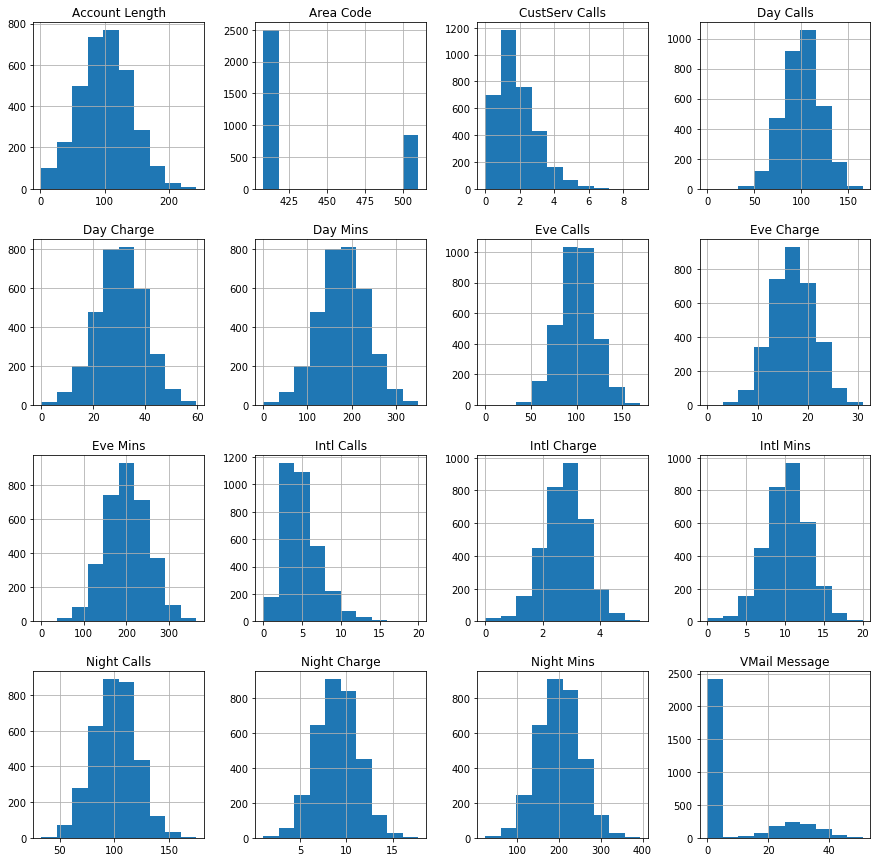

In [168]:
df.hist(figsize=(15,15))

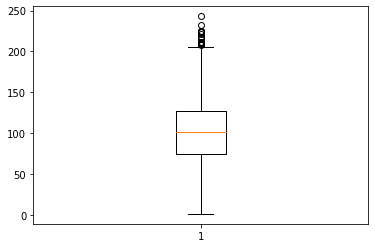

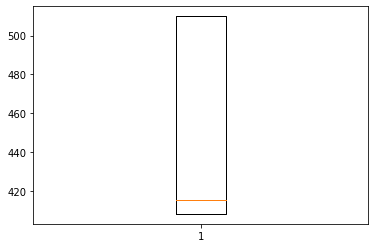

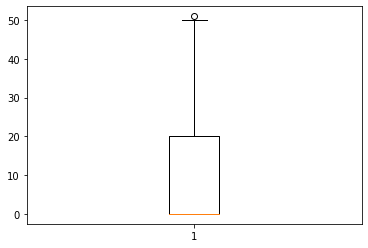

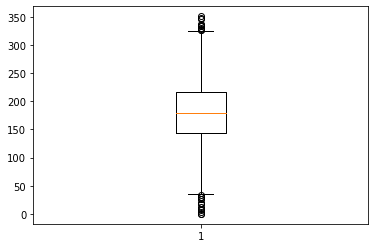

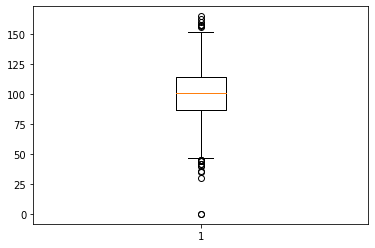

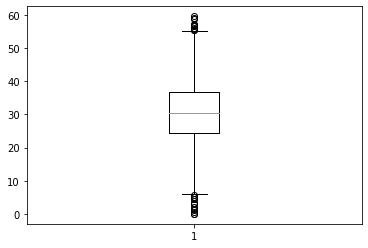

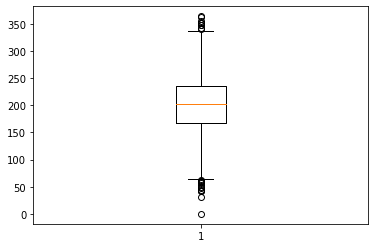

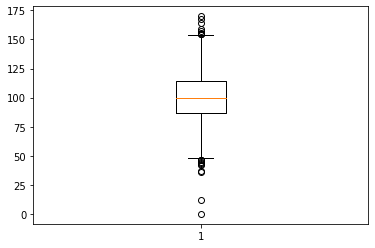

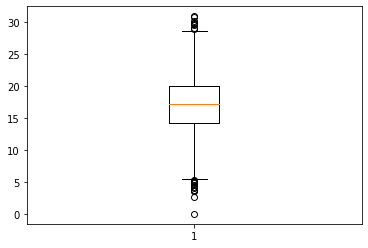

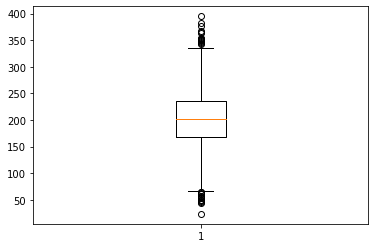

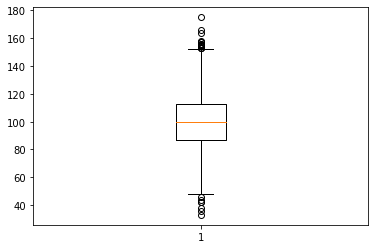

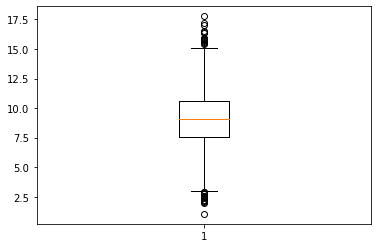

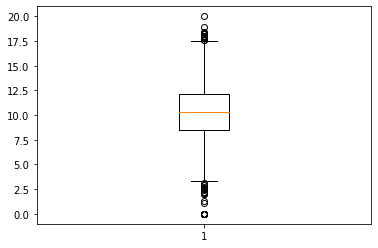

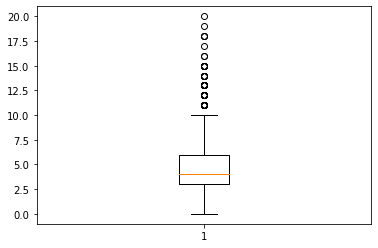

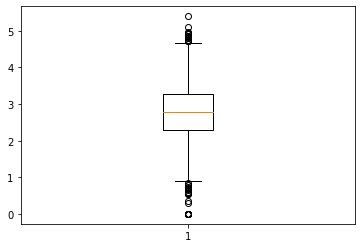

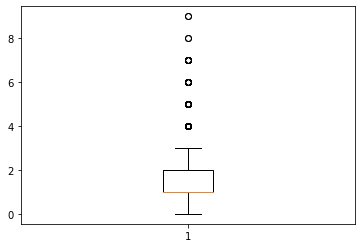

In [169]:
for i in df.columns:
    plt.boxplot(df['%s'%i])
    plt.show()
    

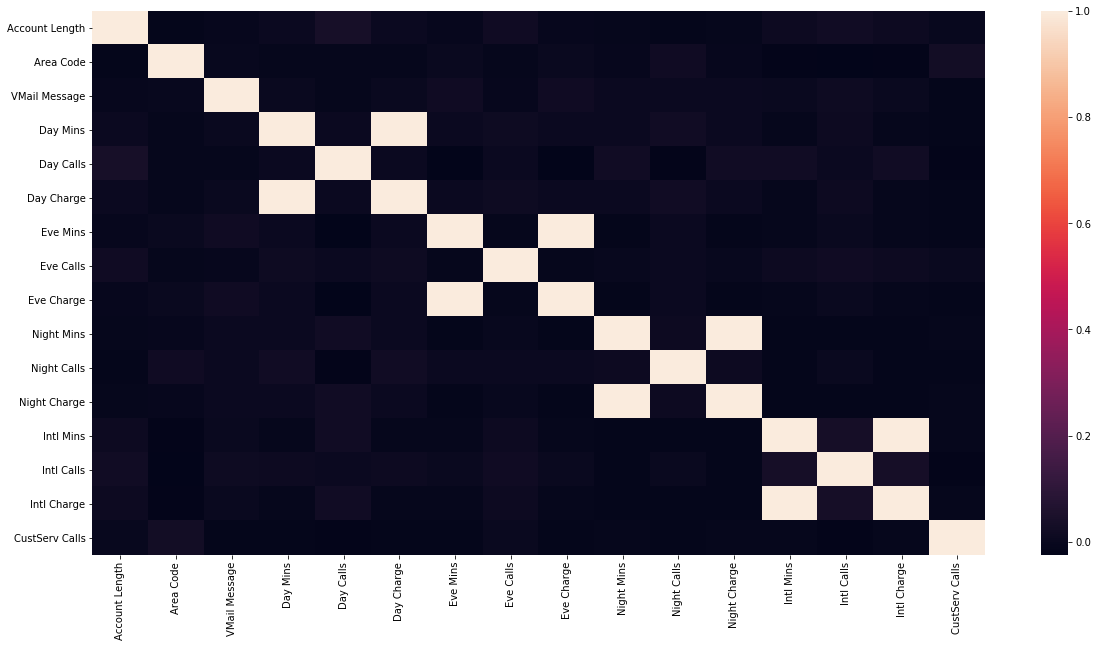

In [170]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())

In [171]:
from sklearn.preprocessing import StandardScaler

df["Intl Plan"] = s1
df["VMail Plan"] = s2   

In [172]:
df.head()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Intl Plan,VMail Plan
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0


In [173]:
scaler=StandardScaler()
X=np.array(df)
X=scaler.fit_transform(X)
X

array([[ 0.67648946, -0.52360328,  1.23488274, ..., -0.42793202,
        -0.32758048,  1.6170861 ],
       [ 0.14906505, -0.52360328,  1.30794844, ..., -0.42793202,
        -0.32758048,  1.6170861 ],
       [ 0.9025285 , -0.52360328, -0.59175986, ..., -1.1882185 ,
        -0.32758048, -0.61839626],
       ...,
       [-1.83505538,  1.71881732, -0.59175986, ...,  0.33235445,
        -0.32758048, -0.61839626],
       [ 2.08295458,  1.71881732, -0.59175986, ...,  0.33235445,
         3.05268496, -0.61839626],
       [-0.67974475, -0.52360328,  1.23488274, ..., -1.1882185 ,
        -0.32758048,  1.6170861 ]])

In [174]:
X[1]

array([ 0.14906505, -0.52360328,  1.30794844, -0.33373776,  1.12450284,
       -0.33401297, -0.10808036,  0.14486653, -0.10754944,  1.05857074,
        0.14782467,  1.05938994,  1.24048169, -0.60119509,  1.2411686 ,
       -0.42793202, -0.32758048,  1.6170861 ])

In [175]:
c = pd.DataFrame(X)
c.columns = df.columns

In [176]:
c.head(3)

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Intl Plan,VMail Plan
0,0.676489,-0.523603,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,-0.32758,1.617086
1,0.149065,-0.523603,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,-0.32758,1.617086
2,0.902529,-0.523603,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,-0.32758,-0.618396


# Build Model using Random Forest

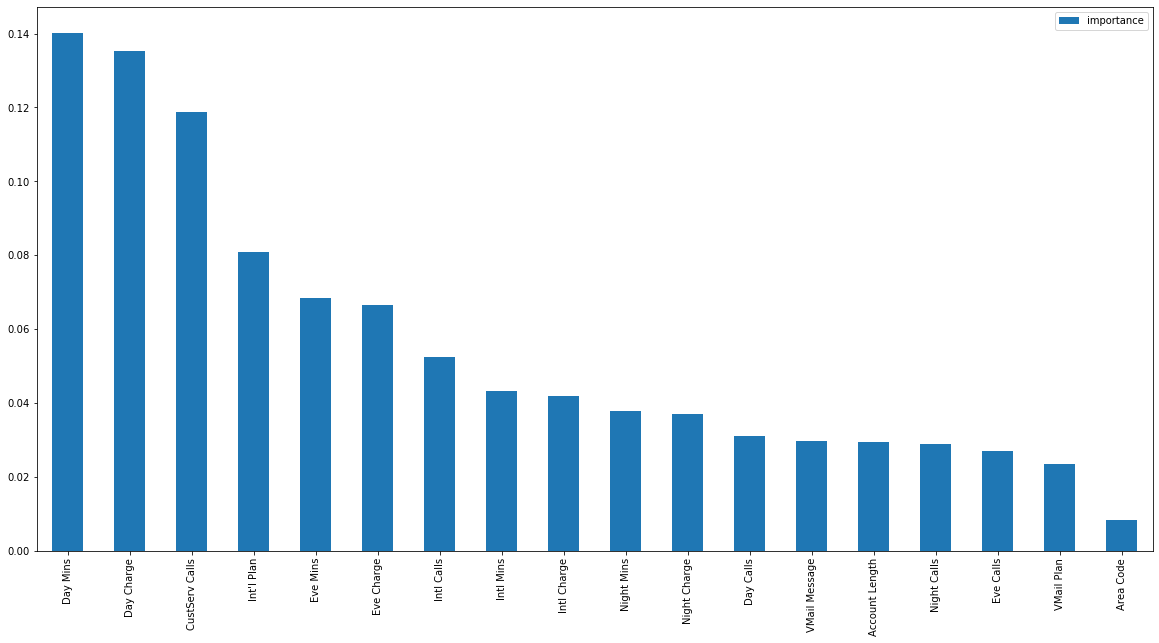

In [177]:
importance.plot(kind='bar',stacked = True, figsize=(20,10))
plt.show()

In [178]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

from sklearn.ensemble import RandomForestClassifier 
import pandas as pd
model.fit(c,target)
feature_importances = pd.DataFrame(model.feature_importances_,index = c.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Day Mins,0.138292
Day Charge,0.136808
CustServ Calls,0.117907
Intl Plan,0.082992
Eve Charge,0.067450
Eve Mins,0.067314
Intl Calls,0.051721
Intl Charge,0.042170
Intl Mins,0.041077
Night Mins,0.038324


## Split the dataset and build model

In [195]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(c,target,test_size = 0.33)
model_RF=RandomForestClassifier(n_estimators=1000)
model_RF.fit(X_train,y_train)
print(model_RF.score(X_test,y_test))

0.9427272727272727


In [180]:
y_predict=modell.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[928,  11],
       [ 37, 124]], dtype=int64)

In [181]:
# Number of true positives divided by the total number
# of elements that actually belong to the positive class

In [182]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       939
           1       0.92      0.77      0.84       161

   micro avg       0.96      0.96      0.96      1100
   macro avg       0.94      0.88      0.91      1100
weighted avg       0.96      0.96      0.95      1100



In [185]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_predict)

0.8792358727071882

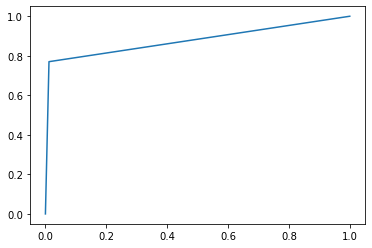

In [189]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
plt.plot(fpr,tpr)
plt.show()

# Naive Bayes Classifier

In [194]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(X_train,y_train)
print(model_NB.score(X_test,y_test))

0.850909090909091


# Combining both models

In [196]:
m_RF = model_RF.predict_proba(X_test)
m_NB= model_NB.predict_proba(X_test)

In [198]:
m_final = 0.5*m_RF + 0.5*m_NB
m_final

array([[0.95980984, 0.04019016],
       [0.9488096 , 0.0511904 ],
       [0.97968312, 0.02031688],
       ...,
       [0.98494034, 0.01505966],
       [0.86222193, 0.13777807],
       [0.16351844, 0.83648156]])

In [202]:
m_final

array([[0.95980984, 0.04019016],
       [0.9488096 , 0.0511904 ],
       [0.97968312, 0.02031688],
       ...,
       [0.98494034, 0.01505966],
       [0.86222193, 0.13777807],
       [0.16351844, 0.83648156]])

In [204]:
len(m_final)

1100

In [211]:
y_predicted = []
for i in range(1100):
    y_predicted.append(int(m_final[i][0] < m_final[i][1]))  

In [212]:
y_predicted

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [213]:
confusion_matrix(y_test,y_predicted)

array([[882,  65],
       [ 58,  95]], dtype=int64)

In [215]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       947
           1       0.59      0.62      0.61       153

   micro avg       0.89      0.89      0.89      1100
   macro avg       0.77      0.78      0.77      1100
weighted avg       0.89      0.89      0.89      1100



# With 2 models Recall still decreased.So try CROSS VALIDATION METHOD 

# Beyond Accuracy
recall = TP/TP+FN ; 
recall = Churns Correctly Identified /Churners Correctly Identified+Churners Incorrectly labelled as not churners

Here, observed overall accuracy is looking  good, but recall is not good
So, need to improve recall, such that our accurate curners could identify correctly

# Conclusion : 
    Day Minuits, Day Charges, CustomerService Calls are focusable features.
    Have to take appropriate actions on these featueres  
    

# KFold Cross Validation

## Advantages and Disadvantages of K fold Cross
There are some advantages of k fold cross-validation with over validation techniques.
There are some disadvantages as well. Let's have a look into them.

## Advantages
#### Better Model Accuracy: Using k-fold cross validation you will get a more accurate model than using 
just a random split of data set into train and test sets.

#### Reduce Overfitting: When you are using cross-validation, the model is rigorously trained and tested 
along the way. So, the data you give to the model will be distributed in a more proper way than 
just a train and test method. This will make the model less overfitted to the train set, eventually
giving an improved performance on unseen data.  

#### Better Hyperparameter: Tuning Hyperparameter tuning methods such as grid search and random search 
with k fold cross-validation are more powerful than without cross-validation. You should use 
hyperparameter tuning methods with cross-validation for better performance.

#### Better Feature Extraction: Cross-validation can be used to extract the most important features of a 
data set. Reverse Feature Extraction with Cross-Validation(RFECV) is such a method that uses 
cross-validation while extracting the best features for a machine learning model.

### Improved Models: for Imbalanced Data K fold cross-validation methods are very handy for imbalanced 
data. As the data is equally splitter among the train and test sets, the distribution of the data
will be balanced, eventually leading to a better performing model.

## Disadvantages 
#### Computational Cost: Doing cross-validation will require extra time. If you choose cross-validation
methods like LOOCV for large data samples, the computational overhead will be high. But using like
5 fold or 10 fold cross-validation would not take much time. And the performance will be quite 
satisfactory.

#### Bad with Sequential Data: If you are working with sequential data such as time series data, 
k fold cross-validation is a bad choice. Because it does not work well with sequential data due
to its nature. In time series, you need to predict the future value based on a series of past 
values of your data. Under this constraint, k fold will be failed to perform well. But you can 
use the time-series split, a variation of k fold, to cross-validate time series model.

# SVM

In [183]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, target, cv=5)
scores

array([0.85457271, 0.85457271, 0.85457271, 0.85585586, 0.85585586])

In [ ]:
classification_report

# RandomForestClassifier 

In [184]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=c,y = target,cv = 5)
all_accuracies


array([0.95202399, 0.94902549, 0.96251874, 0.95795796, 0.96096096])

# LDA algorithm with and with out classification

In [233]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

Xtrain,Xtest,Ytrain,Ytest = train_test_split(c,target,train_size=0.5,random_state=1)

clf = LinearDiscriminantAnalysis()
clf.fit(Xtrain, Ytrain)
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto', solver='lsqr', store_covariance=False, tol=0.001)

# without cross-valdidation
prediction = clf.predict(Xtest)

# with cross-validation
cv = KFold(n_splits=2)
prediction_cv = cross_val_predict(clf, Xtest, Ytest, cv=cv)

print("LDA accuracy with out cross validation:",accuracy_score(Ytest,prediction))
print("LDA accuracy with out cross validation:",accuracy_score(Ytest,prediction))


print("LDA with out cross validation:",classification_report(Ytest,prediction))
print("LDA with cross validation:", classification_report(Ytest,prediction_cv))
# Note : Observed poor recall as well as poor accuracy, with and with out cross validation cross validation

LDA accuracy with out cross validation: 0.8500299940011997
LDA accuracy with out cross validation: 0.8500299940011997
LDA with out cross validation:               precision    recall  f1-score   support

           0       0.88      0.95      0.92      1430
           1       0.45      0.24      0.31       237

   micro avg       0.85      0.85      0.85      1667
   macro avg       0.67      0.60      0.61      1667
weighted avg       0.82      0.85      0.83      1667

LDA with cross validation:               precision    recall  f1-score   support

           0       0.88      0.95      0.92      1430
           1       0.47      0.24      0.32       237

   micro avg       0.85      0.85      0.85      1667
   macro avg       0.68      0.60      0.62      1667
weighted avg       0.82      0.85      0.83      1667



c:\users\asha.ponnada\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1430
           1       0.45      0.24      0.31       237

   micro avg       0.85      0.85      0.85      1667
   macro avg       0.67      0.60      0.61      1667
weighted avg       0.82      0.85      0.83      1667



              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1430
           1       0.47      0.24      0.32       237

   micro avg       0.85      0.85      0.85      1667
   macro avg       0.68      0.60      0.62      1667
weighted avg       0.82      0.85      0.83      1667

